# ESA Fire Climate Change Initiative

In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


## NC Format

In [2]:
fn = 'data/20160107-ESACCI-L4_FIRE-BA-MODIS-fv5.0.nc'
ds = nc.Dataset(fn)

In [3]:
list_variables = list()
for var in ds.variables:
    list_variables.append(var)
list_variables

['lat',
 'lat_bnds',
 'lon',
 'lon_bnds',
 'time',
 'time_bnds',
 'vegetation_class',
 'vegetation_class_name',
 'burned_area',
 'standard_error',
 'fraction_of_burnable_area',
 'fraction_of_observed_area',
 'number_of_patches',
 'burned_area_in_vegetation_class']

In [4]:
#explore variables
for var in list_variables: 
    array = ds[var][:]
    print(f" Variable {var} mit Shape {array.shape}")

 Variable lat mit Shape (720,)
 Variable lat_bnds mit Shape (720, 2)
 Variable lon mit Shape (1440,)
 Variable lon_bnds mit Shape (1440, 2)
 Variable time mit Shape (1,)
 Variable time_bnds mit Shape (1, 2)
 Variable vegetation_class mit Shape (18,)
 Variable vegetation_class_name mit Shape (18, 150)
 Variable burned_area mit Shape (1, 720, 1440)
 Variable standard_error mit Shape (1, 720, 1440)
 Variable fraction_of_burnable_area mit Shape (1, 720, 1440)
 Variable fraction_of_observed_area mit Shape (1, 720, 1440)
 Variable number_of_patches mit Shape (1, 720, 1440)
 Variable burned_area_in_vegetation_class mit Shape (1, 18, 720, 1440)


TODO Text: Wir haben verschieden strukturierte Daten 

## Longitude und Latitude

In [6]:
lat = ds['lat'][:]
lon = ds['lon'][:]
lon

masked_array(data=[-179.875, -179.625, -179.375, ...,  179.375,  179.625,
                    179.875],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [7]:
lons, lats = np.meshgrid(lon, lat)
lons

masked_array(
  data=[[-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        ...,
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
        [-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

(3) Runterbrechen der 2-dimensionalen Matrizen auf ein 1-dimensionalen Array. 

In [8]:
lons_flatt = lons.flatten()
lats_flatt = lats.flatten()
lons_flatt

masked_array(data=[-179.875, -179.625, -179.375, ...,  179.375,  179.625,
                    179.875],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

## Numerische Werte 

In [5]:
def create_column(dataset, dataframe, number_dimensions,name_variable):
    if (number_dimensions == 3):
        variable = dataset[name_variable][:]
        variable = variable[0]
        variable_flatt = variable.flatten()
        dataframe[name_variable] = variable_flatt
        return dataframe

In [9]:
#Variable burned_area_in_vegetation_class mit Shape (1, 18, 720, 1440)

burned_area_in_vegetation_class= ds['burned_area_in_vegetation_class'][:]
burned_area_in_vegetation_class = burned_area_in_vegetation_class[0]


In [11]:
df_whole_world = create_column(ds, df_whole_world, 3, 'burned_area')

In [10]:
whole_world = {
    'lon': lons_flatt, 
    'lat': lats_flatt, 
}
df_whole_world = pd.DataFrame(whole_world)
df_whole_world

,lon,lat
0,-179.875,89.875
1,-179.625,89.875
2,-179.375,89.875
3,-179.125,89.875
4,-178.875,89.875
...,...,...
1036795,178.875,-89.875
1036796,179.125,-89.875
1036797,179.375,-89.875
1036798,179.625,-89.875


TODO Erklären, wie numerische Werte aufbereitet werden

## Weitere Kennwerte

## Vegetationsklassen 

In [12]:
vegetation_class = ds['vegetation_class'][:]
vegetation_class

masked_array(data=[ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110,
                   120, 130, 140, 150, 160, 170, 180],
             mask=False,
       fill_value=999999)

In [13]:
vegetation_class_name = ds['vegetation_class_name'][:]
#vegetation_class_name[1]

TODO Erklärung der Vegetationsklassen

In [14]:
name_vegetation_class ={
    10: ['no_data'], 
    20: ['cropland_rainfed'], #Ackerland 
    30: ['cropland_irrigated'], #Ackerland_bewässert
    40: ['50_mosaic_cropland_50_natural_vegetation'], #Ackerland >50%, natürliche Bepflanzung <50%
    50: ['tree_cover_broadleaved_evergreen'], # immergrüne Laubbäume 
    60: ['tree_cover_broadleaved_deciduous'], # laubabwerfend Laubbäume
    70: ['tree_cover_needleleaved_evergreen'], # immmergrüne Nadelbäume
    80: ['tree_cover_needleleaved_deciduous'], # laubabwerfend Laubbäume
    90: ['tree_cover_mixed_leave'], # Mischwald
    100: ['50_mosaic_tree_50_herbaceous'], # Bäume >50%, <50% krautig Bewachsen
    110: ['50_herbaceous_50_tree'], # >50% krautige Bewachsen, <50% Bäu,e 
    120: ['shrubland'], #Buschland
    130: ['grassland'], #Grasland
    140: ['lichens_and_mosses'], #Flechten und Moose
    150: ['sparse_vegetation'], #spärliche Vegetation 
    160: ['tree_cover_flooded_fresh_water'], #geflutete Bäume Süßwasser
    170: ['tree_cover_flooded_saline_water'], # geflutete Bäume Salzwasser
    180: ['shrub_flooded_water'] #geflutetes Buschland
}

Für das Projekt werden die einzelnen Kategorien zusammengefasst: 
* 10: no_data
* 20, 30, 40: cropland
* 100, 110: mosaic_tree_grass
* 120, 130, 140, 150: other_vegetation
* 160, 170, 180: flooded_area

Die Vegetationsklassen 50 -90 werden belassen, da die Untersuchung von Waldbränden im Fokus steht und dabei die genaue Aufsplitung interessant sein kann. 

In [15]:
i_vegetation_class = 10 
for burned_area_per_veg_class in burned_area_in_vegetation_class:
    s_vegetation_class= f"{i_vegetation_class}_burned_area"
    burned_area_per_veg_class_flatt= burned_area_per_veg_class.flatten()
    df_whole_world[s_vegetation_class] = burned_area_per_veg_class_flatt
    i_vegetation_class= i_vegetation_class + 10
    #print(a)

In [16]:
df_burned  = df_whole_world
df_burned

,lon,lat,burned_area,10_burned_area,20_burned_area,30_burned_area,40_burned_area,50_burned_area,60_burned_area,70_burned_area,...,90_burned_area,100_burned_area,110_burned_area,120_burned_area,130_burned_area,140_burned_area,150_burned_area,160_burned_area,170_burned_area,180_burned_area
0,-179.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-179.625,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-179.375,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-179.125,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-178.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036795,178.875,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036796,179.125,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036797,179.375,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036798,179.625,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Spalte umbennen
df_burned['cropland_burned_area'] = df_burned['20_burned_area'] + df_burned['30_burned_area'] + df_burned['40_burned_area']
df_burned['mosaic_tree_grass_burned_area'] = df_burned['100_burned_area'] + df_burned['100_burned_area']
df_burned['other_vegetation_burned_area']= df_burned['120_burned_area'] + df_burned['130_burned_area'] + df_burned['140_burned_area']+ df_burned['150_burned_area']
df_burned['flooded_area_burned_area']= df_burned['160_burned_area'] + df_burned['170_burned_area'] + df_burned['180_burned_area']


In [18]:
df_burned.drop(columns=['20_burned_area','30_burned_area','40_burned_area','100_burned_area','110_burned_area','120_burned_area', '130_burned_area', '140_burned_area', '150_burned_area','160_burned_area','170_burned_area','180_burned_area'], inplace=True)

In [19]:
replace_names={ '10_burned_area': name_vegetation_class[10][0] + "_burned_area",
                '50_burned_area': name_vegetation_class[50][0] + "_burned_area",
                '60_burned_area': name_vegetation_class[60][0] + "_burned_area", 
                '70_burned_area': name_vegetation_class[70][0] + "_burned_area", 
                '80_burned_area': name_vegetation_class[80][0] + "_burned_area", 
                '90_burned_area': name_vegetation_class[90][0] + "_burned_area", }
replace_names

{'10_burned_area': 'no_data_burned_area',
 '50_burned_area': 'tree_cover_broadleaved_evergreen_burned_area',
 '60_burned_area': 'tree_cover_broadleaved_deciduous_burned_area',
 '70_burned_area': 'tree_cover_needleleaved_evergreen_burned_area',
 '80_burned_area': 'tree_cover_needleleaved_deciduous_burned_area',
 '90_burned_area': 'tree_cover_mixed_leave_burned_area'}

In [20]:
df_burned.rename(columns = replace_names, inplace = True)
df_burned

,lon,lat,burned_area,no_data_burned_area,tree_cover_broadleaved_evergreen_burned_area,tree_cover_broadleaved_deciduous_burned_area,tree_cover_needleleaved_evergreen_burned_area,tree_cover_needleleaved_deciduous_burned_area,tree_cover_mixed_leave_burned_area,cropland_burned_area,mosaic_tree_grass_burned_area,other_vegetation_burned_area,flooded_area_burned_area
0,-179.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-179.625,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-179.375,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-179.125,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-178.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036795,178.875,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036796,179.125,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036797,179.375,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036798,179.625,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_burned = create_column(ds, df_burned, 3, 'standard_error')
df_burned = create_column(ds, df_burned, 3, 'fraction_of_burnable_area')
df_burned = create_column(ds, df_burned, 3, 'fraction_of_observed_area')
df_burned = create_column(ds, df_burned, 3, 'number_of_patches')
df_burned

,lon,lat,burned_area,no_data_burned_area,tree_cover_broadleaved_evergreen_burned_area,tree_cover_broadleaved_deciduous_burned_area,tree_cover_needleleaved_evergreen_burned_area,tree_cover_needleleaved_deciduous_burned_area,tree_cover_mixed_leave_burned_area,cropland_burned_area,mosaic_tree_grass_burned_area,other_vegetation_burned_area,flooded_area_burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches
0,-179.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-179.625,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-179.375,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-179.125,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-178.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036795,178.875,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036796,179.125,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036797,179.375,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036798,179.625,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
 #Variable standard_error mit Shape (1, 720, 1440)
 #Variable fraction_of_burnable_area mit Shape (1, 720, 1440)
 #Variable fraction_of_observed_area mit Shape (1, 720, 1440)
 #Variable number_of_patches mit Shape (1, 720, 1440)

Standard error: 
This value is the standard error of the estimation of BA in each grid cell, based on the aggregation of the confidence level of the pixel product.
Fraction of burnable area: 
Includes all land cover categories that can be burned. That means that it excludes water bodies, permanent snow and ice, urban areas and bare areas. Land cover information was extracted from the LC_cci project. 
Fraction of observed area: 
The fraction of observed area is included as a layer in the grid product with the particular aim of providing information on the incomplete observation of the Earth surface by the input sensor. This may be caused by a sensor failure or by persistent cloud coverage.
Number of patches: 
Number of contiguous groups of burned pixels. Contiguity is defined as any burned pixel that has contact with the side of another burned pixel during the month.

## Hinzufügen der Länder Informatioen 

In [3]:
#TODO Zeitlicher Vergleich der zwei Bibliotheken 

# Ergänzung Informationen Zeit

## Auswertung einzelner Data Frame

Muss bedacht werden: 
Fraction of burnable area: 
An example of this layer corresponding to August 2019 is shown in Figure 3.4. This layer does not change monthly, but only when a new land cover year is considered (see section 2.8)
Fraction of observed area:
Recommendation on product use: this is a very important attribute to consider, as it shows the proportion of each cell that was not observed in a particular month and therefore it identifies the regions where the product may miss burned pixels. All grid cells with fraction of observed area lower than 80% should be used with care.
Standard_error: unklar


In [23]:
df_burned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036800 entries, 0 to 1036799
Data columns (total 17 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   lon                                            1036800 non-null  float32
 1   lat                                            1036800 non-null  float32
 2   burned_area                                    1036800 non-null  float32
 3   no_data_burned_area                            1036800 non-null  float32
 4   tree_cover_broadleaved_evergreen_burned_area   1036800 non-null  float32
 5   tree_cover_broadleaved_deciduous_burned_area   1036800 non-null  float32
 6   tree_cover_needleleaved_evergreen_burned_area  1036800 non-null  float32
 7   tree_cover_needleleaved_deciduous_burned_area  1036800 non-null  float32
 8   tree_cover_mixed_leave_burned_area             1036800 non-null  float32
 9   cropland_burned_area    

In [24]:
for column_name in df_burned.columns:
    column = df_burned[column_name]
    count = (column == 0).sum()
    print('Anzahl an 0 in Spalte', column_name, ' ist : ', count)

Anzahl an 0 in Spalte lon  ist :  0
Anzahl an 0 in Spalte lat  ist :  0
Anzahl an 0 in Spalte burned_area  ist :  1029171
Anzahl an 0 in Spalte no_data_burned_area  ist :  1033335
Anzahl an 0 in Spalte tree_cover_broadleaved_evergreen_burned_area  ist :  1035138
Anzahl an 0 in Spalte tree_cover_broadleaved_deciduous_burned_area  ist :  1032580
Anzahl an 0 in Spalte tree_cover_needleleaved_evergreen_burned_area  ist :  1036675
Anzahl an 0 in Spalte tree_cover_needleleaved_deciduous_burned_area  ist :  1036800
Anzahl an 0 in Spalte tree_cover_mixed_leave_burned_area  ist :  1036793
Anzahl an 0 in Spalte cropland_burned_area  ist :  1032481
Anzahl an 0 in Spalte mosaic_tree_grass_burned_area  ist :  1034957
Anzahl an 0 in Spalte other_vegetation_burned_area  ist :  1031717
Anzahl an 0 in Spalte flooded_area_burned_area  ist :  1035968
Anzahl an 0 in Spalte standard_error  ist :  1029171
Anzahl an 0 in Spalte fraction_of_burnable_area  ist :  798409
Anzahl an 0 in Spalte fraction_of_observ

In [25]:
df_observed_area = df_burned[df_burned['fraction_of_observed_area']>0.8]

In [26]:
df_observed_area.describe()

,lon,lat,burned_area,no_data_burned_area,tree_cover_broadleaved_evergreen_burned_area,tree_cover_broadleaved_deciduous_burned_area,tree_cover_needleleaved_evergreen_burned_area,tree_cover_needleleaved_deciduous_burned_area,tree_cover_mixed_leave_burned_area,cropland_burned_area,mosaic_tree_grass_burned_area,other_vegetation_burned_area,flooded_area_burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches
count,165389.000000,165389.000000,1.653890e+05,1.653890e+05,1.653890e+05,1.653890e+05,1.653890e+05,165389.0,165389.000000,1.653890e+05,1.653890e+05,1.653890e+05,1.653890e+05,1.653890e+05,165389.000000,165389.000000,165389.000000
mean,21.905655,27.626211,1.283388e+06,1.008241e+05,2.160066e+04,5.727512e+05,8.689440e+02,0.0,8.111863,1.160820e+05,1.467081e+05,3.764263e+05,2.013854e+04,5.008886e+04,0.830648,0.974689,1.664228
std,88.200104,32.434048,1.339601e+07,2.341526e+06,8.152116e+05,8.850809e+06,8.888986e+04,0.0,1377.649902,2.442211e+06,3.720692e+06,6.305398e+06,7.402214e+05,2.942014e+05,0.301963,0.047316,14.087423
min,-179.625000,-55.875000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000069,0.800000,0.000000
25%,-66.625000,4.875000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.850582,0.973988,0.000000
50%,34.375000,34.875000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.984566,0.999988,0.000000
75%,96.375000,56.125000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.999502,1.000000,0.000000
max,179.875000,78.625000,5.412580e+08,2.852781e+08,2.069823e+08,5.070177e+08,2.822751e+07,0.0,268323.000000,2.562998e+08,3.585834e+08,5.412580e+08,8.167686e+07,3.185519e+06,1.000000,1.000000,498.000000


In [27]:
import plotly.express as px
df_observed_area_burn = df_observed_area[df_observed_area['burned_area']>0]
#fig = px.scatter_geo(df_observed_area_burn, lon="lon",lat="lat",color='burned_area')
#fig.show()

In [28]:
#fig = px.scatter_geo(df_observed_area, lon="lon",lat="lat",color='fraction_of_burnable_area')
#fig.show()

TODO Bedrachtung numerischer Wert
-> Schlussfolgerung: 
* burned area > 0, observed area > 0.8 

## Data Exploration 

### Numerical Values

In [29]:
df_numerical = df_observed_area[['burned_area', 'standard_error','fraction_of_burnable_area','fraction_of_observed_area', 'number_of_patches' ]]

In [30]:
df_numerical.describe()

,burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches
count,1.653890e+05,1.653890e+05,165389.000000,165389.000000,165389.000000
mean,1.283388e+06,5.008886e+04,0.830648,0.974689,1.664228
std,1.339601e+07,2.942014e+05,0.301963,0.047316,14.087423
min,0.000000e+00,0.000000e+00,0.000069,0.800000,0.000000
25%,0.000000e+00,0.000000e+00,0.850582,0.973988,0.000000
50%,0.000000e+00,0.000000e+00,0.984566,0.999988,0.000000
75%,0.000000e+00,0.000000e+00,0.999502,1.000000,0.000000
max,5.412580e+08,3.185519e+06,1.000000,1.000000,498.000000


### Korrelation

In [31]:
corr_matrix = df_numerical.corr()
corr_matrix

,burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches
burned_area,1.000000,0.753360,0.051980,0.050848,0.719608
standard_error,0.753360,1.000000,0.089560,0.088193,0.829647
fraction_of_burnable_area,0.051980,0.089560,1.000000,0.014466,0.063728
fraction_of_observed_area,0.050848,0.088193,0.014466,1.000000,0.062504
number_of_patches,0.719608,0.829647,0.063728,0.062504,1.000000


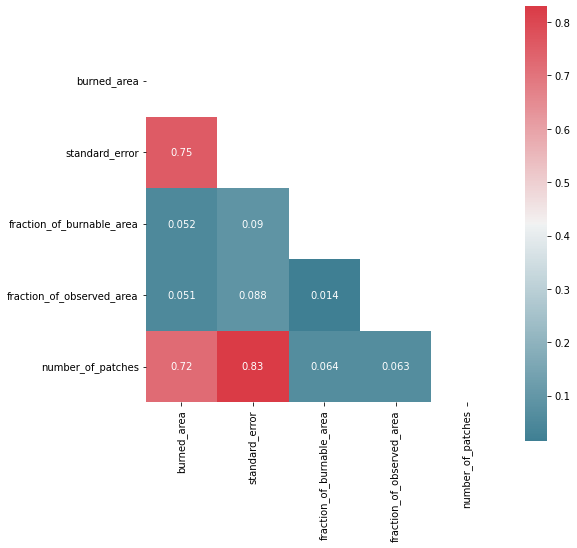

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 8]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, cmap= cmap,  annot=True)

TODO Weg lassen von Standard Error oder number of patches 

## Add geographic information

In [33]:
df_observed_area 

,lon,lat,burned_area,no_data_burned_area,tree_cover_broadleaved_evergreen_burned_area,tree_cover_broadleaved_deciduous_burned_area,tree_cover_needleleaved_evergreen_burned_area,tree_cover_needleleaved_deciduous_burned_area,tree_cover_mixed_leave_burned_area,cropland_burned_area,mosaic_tree_grass_burned_area,other_vegetation_burned_area,flooded_area_burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches
65926,101.625,78.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003170,1.000000,0.0
65930,102.625,78.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000352,1.000000,0.0
65936,104.125,78.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000704,1.000000,0.0
65938,104.625,78.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000704,1.000000,0.0
65940,105.125,78.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023215,0.818182,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838530,-67.375,-55.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.356343,0.949921,0.0
838532,-66.875,-55.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004552,1.000000,0.0
839970,-67.375,-55.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265379,0.912304,0.0
839971,-67.125,-55.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165903,0.973126,0.0


In [107]:
df_burned.shape[0]

1036800

In [100]:
df_geo = df_observed_area_burn

In [101]:
df_geo.shape[0]

7472

In [102]:
import time 

In [103]:
import reverse_geocoder as rg

In [104]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")

In [108]:
st = time.time()

coords = tuple(zip(df_burned['lat'], df_burned['lon']))

results_rg = rg.search(coords)
results_admin2 = [x.get('cc') for x in results_rg]

# Optional: insert admin2 results into new df column
df_burned['admin2'] = results_admin2
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 2.8761653900146484 seconds


In [109]:
df_burned

,lon,lat,burned_area,no_data_burned_area,tree_cover_broadleaved_evergreen_burned_area,tree_cover_broadleaved_deciduous_burned_area,tree_cover_needleleaved_evergreen_burned_area,tree_cover_needleleaved_deciduous_burned_area,tree_cover_mixed_leave_burned_area,cropland_burned_area,mosaic_tree_grass_burned_area,other_vegetation_burned_area,flooded_area_burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches,admin2
0,-179.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RU
1,-179.625,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RU
2,-179.375,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RU
3,-179.125,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RU
4,-178.875,89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036795,178.875,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AQ
1036796,179.125,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AQ
1036797,179.375,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AQ
1036798,179.625,-89.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AQ


In [97]:
st = time.time()
df_geo['add'] = df_geo.apply(lambda x : (geolocator.reverse((x['lat'], x['lon']), zoom=3, language= 'en')).address, axis = 1)
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 49.61789107322693 seconds


In [98]:
df_geo

,lon,lat,burned_area,no_data_burned_area,tree_cover_broadleaved_evergreen_burned_area,tree_cover_broadleaved_deciduous_burned_area,tree_cover_needleleaved_evergreen_burned_area,tree_cover_needleleaved_deciduous_burned_area,tree_cover_mixed_leave_burned_area,cropland_burned_area,mosaic_tree_grass_burned_area,other_vegetation_burned_area,flooded_area_burned_area,standard_error,fraction_of_burnable_area,fraction_of_observed_area,number_of_patches,admin2,add
268537,-5.625,43.375,107329.0,0.0,0.0,107329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75884.0,0.947559,0.998879,2.0,ES,Spain
268538,-5.375,43.375,160994.0,0.0,0.0,160994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92933.0,0.993981,0.993855,3.0,ES,Spain
268539,-5.125,43.375,643976.0,0.0,0.0,536646.0,0.0,0.0,0.0,0.0,0.0,107329.0,0.0,185742.0,0.882319,0.888590,9.0,ES,Spain
268544,-3.875,43.375,53664.0,0.0,0.0,53664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53659.0,0.733690,0.977075,1.0,ES,Spain
269983,-4.125,43.125,5688452.0,0.0,0.0,4990814.0,482981.0,0.0,0.0,53664.0,0.0,160994.0,0.0,548827.0,0.982586,1.000000,22.0,ES,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366756,69.125,26.375,107329.0,0.0,0.0,0.0,0.0,0.0,0.0,107329.0,0.0,0.0,0.0,75887.0,0.986589,1.000000,2.0,PK,Pakistan
367527,-98.125,26.125,3863858.0,3863858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,453610.0,0.811833,0.995727,5.0,US,United States
367528,-97.875,26.125,2092921.0,1717269.0,0.0,0.0,0.0,0.0,0.0,107329.0,0.0,268323.0,0.0,334537.0,0.917266,0.999407,2.0,US,United States
367529,-97.625,26.125,53664.0,53664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53662.0,0.882057,1.000000,1.0,US,United States


# Entscheidung Mongo DB

## Querys und Visualisierungen

### Erste Visualisierung 

Durch eine erste Visualisierung wird ein Überblick über die Daten erzielt und die Datenverarbeitung kann plausiblisiert werden. 

## Vorgehensweise

Folgende Schritte sollen innerhalb der Projektarbeit umgesetzt weren: 

1.	Dataframe (siehe [Erstellung Dataframe](#erstellung-dataframe)) um weitere Variablen aus dem ursprünglichen Daten erweitern, z.B. fraction_of_burnable_area
2.	Dataframe mit Attributen zu Kontinent und Land anreichern (z.B. mit Bibliothek ``shaply``)
3.	Überprüfung durchführen, ob weitere berechnete Attribute notwendig sind
4. (ggf.Attribute berechnen)
5.	Dataframe in SQL-Datenbank exportieren
6.	Zeitliche Dimension, durch die Durchführung der Schritt 1-6 für weitere Dateien, zur Datenbank ergänzen
7.	Erstellung verschiedener Abfragen auf die Datenbank
8.	Explorative Datenanalyse der Daten 


## Quellen

[1]: https://www.spiegel.de/politik/deutschland/sachsen-michael-kretschmer-bricht-urlaub-wegen-waldbraenden-ab-a-9cde7363-0b93-4a5a-a711-ff7c5391858e, Datum des Aufrufs: 07.08.2022

[2]: https://de.statista.com/infografik/18581/anzahl-und-flaeche-aller-waldbraende-in-deutschland/, Datum des Aufrufs: 07.08.2022

[3]: https://climate.esa.int/en/odp/#/dashboard, Datum des Aufrufs: 07.08.2022
